# Milestone 2 - *Laura Letef*
---

## Task 4 & 5:
## Conduct an Exploratory Data Analysis (EDA) on your dataset and Use This Analysis to Answer The Research Question

In [2]:
import pandas as pd
import numpy as np

from project_functions import load
from project_functions import prune
from project_functions import wrangle

## Importing the Data

In [3]:
df = prune(wrangle(load("../../data/raw/meteorite-landings.csv")))
df

,Name,ID,Status,Class,Mass (g),Fall,Year,Latitude,Longitude,GeoLocation
0,Aachen,1.0,Valid,L5,21.0,Observed,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2.0,Valid,H6,720.0,Observed,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6.0,Valid,EH4,107000.0,Observed,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10.0,Valid,Acapulcoite,1914.0,Observed,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370.0,Valid,L6,780.0,Observed,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
31700,Zillah 002,31356.0,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
31701,Zinder,30409.0,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
31702,Zlin,30410.0,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
31703,Zubkovsky,31357.0,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [4]:
import matplotlib as mp
import seaborn as sns

In [5]:
import pandas_profiling as pdp
from pandas_profiling import ProfileReport

prof = ProfileReport(df)
prof.to_file(output_file='output.html')
df.profile_report()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Observations So Far:

- When summarized in the profile report, it is evident that there is not a lot of data for the mass of each meteorite. Taking this into account, it may not be useful to include the mass variable in our research going forward

- Although I initially thought there would be a greater divide between the found and observed meteorite falls, there are *way* more found meteorites in comparison. This may be interesting to analyze in terms of those found locations. 

- Each name is 100% distinct, which is expected

- Graphing the cooridnates of the meteorites may be interesting to observe in future analysis


# Wrangling Data

In [6]:
df.describe()

,ID,Mass (g),Year,Latitude,Longitude
count,31705.000000,3.170500e+04,31705.000000,31705.000000,31705.000000
mean,20751.653272,1.867359e+04,1987.087084,-47.602009,73.452607
std,14974.205352,6.892699e+05,26.791228,46.714171,83.419083
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,9190.000000,6.530000e+00,1983.000000,-79.683330,26.000000
50%,18511.000000,3.007000e+01,1991.000000,-72.000000,57.147030
75%,27300.000000,2.050000e+02,2000.000000,18.393170,159.414820
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


# Data I Want to Specifically Observe & Analyze

In [7]:
laura = df[['Name', 'Mass (g)', 'Fall', 'GeoLocation']]
laura

,Name,Mass (g),Fall,GeoLocation
0,Aachen,21.0,Observed,"(50.775000, 6.083330)"
1,Aarhus,720.0,Observed,"(56.183330, 10.233330)"
2,Abee,107000.0,Observed,"(54.216670, -113.000000)"
3,Acapulco,1914.0,Observed,"(16.883330, -99.900000)"
4,Achiras,780.0,Observed,"(-33.166670, -64.950000)"
...,...,...,...,...
31700,Zillah 002,172.0,Found,"(29.037000, 17.018500)"
31701,Zinder,46.0,Found,"(13.783330, 8.966670)"
31702,Zlin,3.3,Found,"(49.250000, 17.666670)"
31703,Zubkovsky,2167.0,Found,"(49.789170, 41.504600)"


In [19]:
piechart = df.groupby("Fall")["ID"].sum()
piechart

Fall
Found       640407991.0
Observed     17523176.0
Name: ID, dtype: float64

<AxesSubplot:ylabel='ID'>

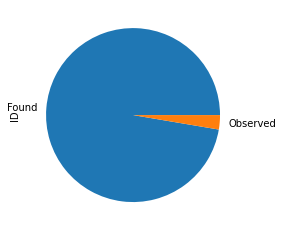

In [22]:
piechart.plot.pie()

## Removing Values 

   Collectively, we decided that including Antartica in our analysis does not provide us with much information, as most of the meteorite findings that occurred in Antarctica were not found but only seen.
    
   Therefore, removing these values (anything with a latitude less than -60) will allow us to further direct our analysis 

In [23]:
dfnew = df[df['Latitude'] > -60] 
dfnew.describe()

,ID,Mass (g),Year,Latitude,Longitude
count,9608.000000,9.608000e+03,9608.000000,9608.000000,9608.000000
mean,22291.755724,6.121558e+04,1979.422773,20.670831,11.678645
std,18070.910452,1.251092e+06,45.798570,21.089500,69.628650
min,1.000000,0.000000e+00,860.000000,-57.786670,-163.166670
25%,6909.750000,9.427500e+01,1976.000000,19.039715,-9.575253
50%,16783.500000,3.700000e+02,1999.000000,26.193335,16.361080
75%,34510.250000,2.125000e+03,2003.000000,31.992045,55.524078
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


This evidently reduced the amount of data points from 31000 to approximately 9600, which will be easier and more convenient to analyze

## Location of Meteorites

   Plotting the longitude vs latitude will also us to analyze the geolocation of the meteorite falls, which is evident in the scatterplot below


Text(0.5, 1.0, 'Location of Meteorites')

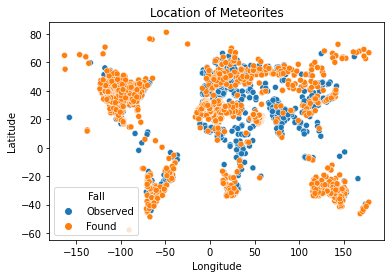

In [24]:
sns.scatterplot(x="Longitude", y="Latitude", hue="Fall", data=dfnew).set_title("Location of Meteorites")

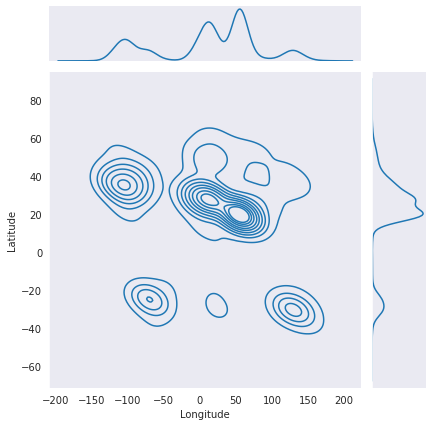

In [25]:
with sns.axes_style('dark'):
    sns.jointplot(x="Longitude", y="Latitude", data=dfnew, palette="inferno",kind='kde');

Text(0.5, 1.0, 'Meteorite Mass')

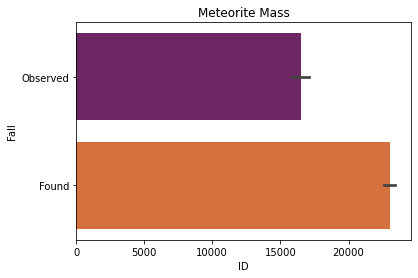

In [26]:
sns.barplot(x="ID", y="Fall", palette="inferno", data=dfnew).set_title("Meteorite Mass")

<AxesSubplot:xlabel='ID', ylabel='Fall'>

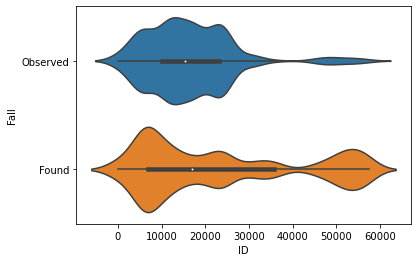

In [30]:
sns.violinplot(x="ID", y="Fall", data=dfnew)

In [31]:
dfFound=dfnew[dfnew['Fall']=='Found']
dfSeen = dfnew[dfnew['Fall']== 'Observed']

In [32]:
dfFound.head()

,Name,ID,Status,Class,Mass (g),Fall,Year,Latitude,Longitude,GeoLocation
1063,Abajo,4.0,Valid,H5,331.00,Found,1982.0,26.80000,-105.41667,"(26.800000, -105.416670)"
1064,Abar al' Uj 001,51399.0,Valid,H3.8,194.34,Found,2008.0,22.72192,48.95937,"(22.721920, 48.959370)"
1065,Abbott,5.0,Valid,H3-6,21100.00,Found,1951.0,36.30000,-104.28333,"(36.300000, -104.283330)"
1066,Abernathy,7.0,Valid,L6,2914.00,Found,1941.0,33.85000,-101.80000,"(33.850000, -101.800000)"
1067,Abo,8.0,Valid,H,1.20,Found,1840.0,60.43333,22.30000,"(60.433330, 22.300000)"


In [33]:
dfFound.describe()

,ID,Mass (g),Year,Latitude,Longitude
count,8545.000000,8.545000e+03,8545.000000,8545.000000,8545.000000
mean,23014.161849,6.291063e+04,1987.576946,19.488891,10.604889
std,18673.338542,1.302041e+06,32.594087,20.536870,69.579008
min,4.000000,0.000000e+00,1575.000000,-57.786670,-163.166670
25%,6856.000000,8.160000e+01,1990.000000,19.015080,-12.810250
50%,16883.000000,2.980000e+02,2000.000000,22.791670,16.347500
75%,35625.000000,1.500000e+03,2003.000000,29.144000,55.386600
max,57455.000000,6.000000e+07,2012.000000,81.166670,178.200000


In [34]:
dfSeen.describe()

,ID,Mass (g),Year,Latitude,Longitude
count,1063.000000,1.063000e+03,1063.000000,1063.000000,1063.000000
mean,16484.643462,4.758984e+04,1913.874882,30.171940,20.310107
std,10527.360498,7.210902e+05,74.778218,22.992631,69.458340
min,1.000000,1.000000e-01,860.000000,-44.116670,-157.866670
25%,10079.500000,7.000000e+02,1875.500000,22.016665,-4.525000
50%,15422.000000,2.900000e+03,1924.000000,36.100000,20.233330
75%,23109.000000,1.050000e+04,1964.000000,46.058335,76.465835
max,57168.000000,2.300000e+07,2013.000000,66.348330,174.400000


Clearly, there are 8545 meteorites that have been physically found versus 1000 meteorites that have only been seen

Text(0.5, 1.0, 'Meteorites Seen')

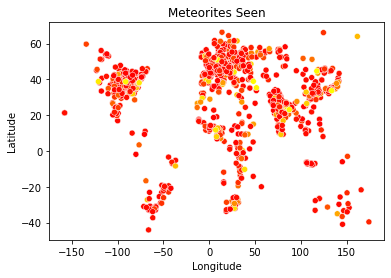

In [35]:

sns.scatterplot(data=dfSeen, x='Longitude', y='Latitude', hue='Class', palette='autumn',legend=False).set_title("Meteorites Seen")

Text(0.5, 1.0, 'Meteorites Found')

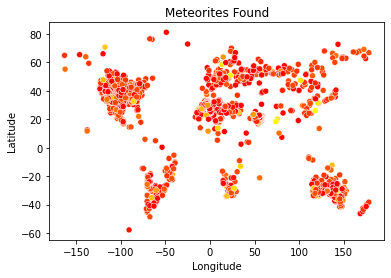

In [36]:
sns.scatterplot(data=dfFound, x='Longitude', y='Latitude', hue='Class', palette='autumn', legend=False).set_title("Meteorites Found")

Text(0.5, 1.0, 'Location of Meteorites')

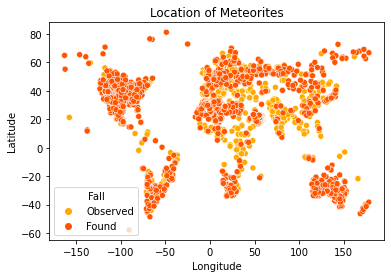

In [37]:
sns.scatterplot(x="Longitude", y="Latitude", hue="Fall", palette='autumn_r', data=dfnew).set_title("Location of Meteorites")

# Task 5 - Conducting Analysis to Answer the Research Questions

   After conducting extensive research and analysis with our dataset, it is clear that our answer to our research question can be answered.
    
   For reiteration purposes: our main focus of research is: *The extent to which the location of a meteor affects its found versus seen status.* After analyzing data, the fall variable provides us with two options for data analysis: observed and found. Observed in this case means that the meteor was simply observed, but not found after the fact. Found, however, means that the meteor was physically found and analyzed. 
   
   Prior to completing exploratory data analysis, I was under the impression that the amount of found meteorites were going to be minimal, but when separating the data, it is clear that over **8000 meteorites** out of the entire dataset were **physically found and analyzed. Only about 1000 meteorites were seen and not found**.
   
   After eliminating the meteorites with the geolocation in Antarctica, it was clear that the majority of meteorites were found there, as the number of meteorites decreased from 30000 to 8000. 
   
   That being said, the majority of found meteorites are located in the Americas and Northern Europe (evident in the 'Location of Meteorites' scatterplot graph). Notably, there is a huge gap for the data in the northern end of South America, which may be due to technology gaps. 
   

Text(0.5, 1.0, 'Location of Meteorites, Including Antarctica')

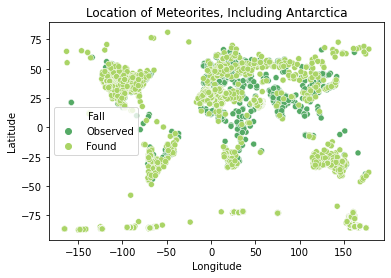

In [38]:
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="Fall", palette='summer').set_title("Location of Meteorites, Including Antarctica")

Text(0.5, 1.0, 'Location of Meteorites, Not Including Antarctica')

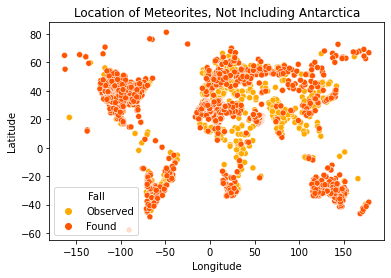

In [39]:
sns.scatterplot(x="Longitude", y="Latitude", hue="Fall", palette='autumn_r', data=dfnew).set_title("Location of Meteorites, Not Including Antarctica")

In [40]:
piechart = dfnew.groupby("Fall")["ID"].sum()
piechart

Fall
Found       196656013.0
Observed     17523176.0
Name: ID, dtype: float64

---
# Conclusion

   In conclusion, when considering technological differences in countries around the world, it is clear that countries who have more experience with space technology, has experienced more meteorite observations and findings. Obviously the Americas are skilled in terms of space technology (NASA, SpaceX) and in Europe (European Astronaut Center (EAC)), as well as, Russia (ROSCOSMOS) which is why they are able to analyze more meteorite findings. But when considering other continents, such as South America and Africa, their space experience is not as heavily advanced as the previous listed countries. Ultimately, this means that the location of a meteorite landing, does play a factor in its found versus seen status. 
   Since most of the meteorites found are located in the Americas, Europe and Russia, it is clear that those were able to be found due to advanced space technology, where areas such as Western Africa and northern South America have less (if any) found meteorite landings. 
   T

## References 

https://www.space.com/tech-robots
https://www.nasa.gov/topics/technology/index.html